In [4]:
! pip install pandas
! pip install scikit-learn
! pip install matplotlib
! pip install numpy

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [76]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder  # Ensure LabelEncoder is imported
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
data = pd.read_csv("clusteringDataset.csv")
print(data.head(2))

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182       95.4               0.0   
1  C10002  3202.467416           0.909091        0.0               0.0   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                         0.0                          0.083333   
1                         0.0                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.00                 0              2        1000.0   
1                    0.25                 4              0        7000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.34021

In [77]:

non_numeric_cols = data.select_dtypes(include=['object']).columns
print("Non-Numeric Columns:", non_numeric_cols.tolist())
if not non_numeric_cols.empty:
    label_encoders = {}
    for col in non_numeric_cols:
        le = LabelEncoder() 
        data[col] = le.fit_transform(data[col])  
        label_encoders[col] = le  

Non-Numeric Columns: ['CUST_ID']


In [78]:
print("Missing values per column:\n", data.isnull().sum())

Missing values per column:
 CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [91]:

data = data.dropna()
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(data_scaled)
silhouette_kmeans = silhouette_score(data_scaled, kmeans_labels)
davies_bouldin_kmeans = davies_bouldin_score(data_scaled, kmeans_labels)
print(f"K-Means Silhouette Score: {silhouette_kmeans:.4f}")
print(f"K-Means Davies-Bouldin Index: {davies_bouldin_kmeans:.4f}")

ValueError: could not convert string to float: 'C10001'

In [ ]:
Improving the Clusters

In [83]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

best_dbi = float("inf")
best_k = None

for k in range(2, 10):  # Try different K values
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    dbi = davies_bouldin_score(data_scaled, labels)
    
    if dbi < best_dbi:
        best_dbi = dbi
        best_k = k

print(f"Optimal K: {best_k}, Best DBI: {best_dbi:.4f}")

kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(data_scaled)


Optimal K: 9, Best DBI: 1.4160


In [84]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Reducing dimensions
data_pca = pca.fit_transform(data_scaled)
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
kmeans_labels_pca = kmeans.fit_predict(data_pca)
dbi_pca = davies_bouldin_score(data_pca, kmeans_labels_pca)
print(f"DBI after PCA: {dbi_pca:.4f}")


DBI after PCA: 0.8169


Silhouette score for k=2: 0.4289251186743723
Silhouette score for k=3: 0.4384428818495356
Silhouette score for k=4: 0.39752054159935346
Silhouette score for k=5: 0.38998341810912324
Silhouette score for k=6: 0.3724705587653696
Silhouette score for k=7: 0.3675855646083244
Silhouette score for k=8: 0.3857966476222699
Silhouette score for k=9: 0.36893373514148325
Silhouette score for k=10: 0.3708863369679595

Best K: 3


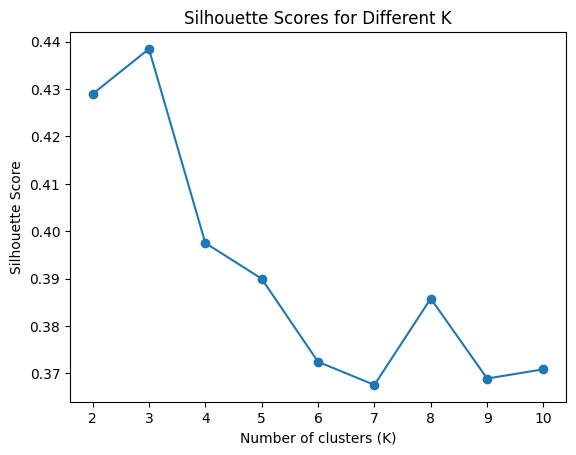

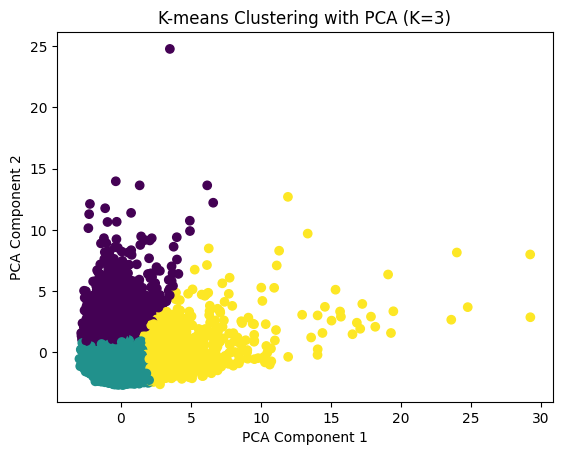

In [87]:
from sklearn.impute import SimpleImputer
data_numeric = data.select_dtypes(include=[np.number])
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data_numeric)
data_imputed_df = pd.DataFrame(data_imputed, columns=data_numeric.columns)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_imputed_df)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
def find_best_k(X, max_k=10):
    silhouette_avg_scores = []
    for k in range(2, max_k+1):
        kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
        kmeans.fit(X)
        cluster_labels = kmeans.labels_
        score = silhouette_score(X, cluster_labels)
        silhouette_avg_scores.append(score)
        print(f"Silhouette score for k={k}: {score}")
    best_k = np.argmax(silhouette_avg_scores) + 2  # because range starts at 2
    print(f"\nBest K: {best_k}")
    plt.plot(range(2, max_k+1), silhouette_avg_scores, marker='o')
    plt.title('Silhouette Scores for Different K')
    plt.xlabel('Number of clusters (K)')
    plt.ylabel('Silhouette Score')
    plt.show()
 return best_k
best_k = find_best_k(X_pca)
kmeans = KMeans(n_clusters=best_k, init='k-means++', random_state=42)
kmeans.fit(X_pca)
cluster_labels = kmeans.labels_
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title(f'K-means Clustering with PCA (K={best_k})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()
